In [ ]:
import pandas as pd #Manipulacion data
import seaborn as sns # Graficas mejoradas
import datetime as dt #Fechas
import matplotlib.pyplot as plt #Graficas por defecto
import matplotlib.ticker as ticker # matplotly interactivo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/ERC 2023_FINAL.csv',sep=";",encoding='latin-1')

In [ ]:
df = df.dropna(subset=['TASA_FILTRACION'])

In [ ]:
#Creación de la variable "TASAFILTRACION", para poder clasificar los estadios de acuerdo a los rangos definidos
import pandas as pd

def crear_columna_estadio(df):
    """
    Crea una columna llamada "estadio" con los valores de la variable "TASAFILTRACION" clasificados en cuatro categorías.

    Args:
      df: Un DataFrame de pandas.

    Returns:
      El DataFrame original con una nueva columna llamada "estadio".
    """
    # Crear una función para asignar una categoría a cada valor de TASAFILTRACION
    def clasificar_estadio(TASA_FILTRACION):
        if TASA_FILTRACION >= 90:
            return "estadio 1"
        elif TASA_FILTRACION >= 60:
            return "estadio 2"
        elif TASA_FILTRACION >= 30:
            return "estadio 3"
        elif TASA_FILTRACION >= 15:
            return "estadio 4"
        else:
            return "estadio 5"

    # Agregar la columna
    df["estadio"] = df["TASA_FILTRACION"].apply(clasificar_estadio)

    return df


In [ ]:
data = crear_columna_estadio(df)

# Ahora, 'data' contendrá la columna adicional 'estadio' con los valores clasificados en cuatro categorías.

In [ ]:
df2=df[['EDAD',
  'CREA ',
  'IMC',
  'ETIO_ERC',
  'Sexo',
  'G_POB',
  'COLES',
  'TA',
  'DX_ERC',
  'ALB/CREA',
  'TIEMP_SERVI',
  'PROG_ERC',
  'ANTAGONISTA',
  'RECIBIO_TRANS','estadio']]
df2

,EDAD,CREA,IMC,ETIO_ERC,Sexo,G_POB,COLES,TA,DX_ERC,ALB/CREA,TIEMP_SERVI,PROG_ERC,ANTAGONISTA,RECIBIO_TRANS,estadio
0,74,0.74,27,Otras,M,Adulto Mayor,181.0,120.0,1,9.00,12,2.0,2.0,5,estadio 2
1,88,NaN,26,Otras,M,Adulto Mayor,NaN,130.0,1,9.00,12,2.0,2.0,5,estadio 3
2,89,1.38,28,Otras,M,Adulto Mayor,187.0,110.0,1,9.00,10,2.0,2.0,5,estadio 3
3,87,0.86,24,Otras,M,Adulto Mayor,153.0,100.0,1,9.00,12,2.0,2.0,5,estadio 3
4,84,1.44,26,Otras,M,Adulto Mayor,276.0,160.0,1,9.00,8,2.0,1.0,5,estadio 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,55,1.46,32,NaN,M,Trabajador Urbano,179.0,122.0,1,3.93,12,1.0,2.0,5,estadio 2
4746,54,1.78,24,NaN,M,Otro,108.0,110.0,1,57.93,12,1.0,1.0,5,estadio 3
4747,62,1.57,28,Otras,M,Otro,NaN,105.0,1,429.70,12,1.0,1.0,5,estadio 3
4748,60,1.32,25,NaN,M,Otro,219.0,110.0,1,1.30,12,1.0,2.0,5,estadio 2


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 0 to 4926
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EDAD           3189 non-null   int64  
 1   CREA           3035 non-null   float64
 2   IMC            3189 non-null   int64  
 3   ETIO_ERC       2308 non-null   object 
 4   Sexo           3189 non-null   object 
 5   G_POB          3189 non-null   object 
 6   COLES          2741 non-null   float64
 7   TA             3170 non-null   float64
 8   DX_ERC         3189 non-null   int64  
 9   ALB/CREA       3173 non-null   float64
 10  TIEMP_SERVI    3189 non-null   int64  
 11  PROG_ERC       3158 non-null   float64
 12  ANTAGONISTA    3144 non-null   float64
 13  RECIBIO_TRANS  3189 non-null   int64  
 14  estadio        3189 non-null   object 
dtypes: float64(6), int64(5), object(4)
memory usage: 398.6+ KB


In [ ]:
df2.fillna(0, inplace=True)

<ipython-input-163-32f74130add2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.fillna(0, inplace=True)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 0 to 4926
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EDAD           3189 non-null   int64  
 1   CREA           3189 non-null   float64
 2   IMC            3189 non-null   int64  
 3   ETIO_ERC       3189 non-null   int64  
 4   Sexo           3189 non-null   int64  
 5   G_POB          3189 non-null   int64  
 6   COLES          3189 non-null   float64
 7   TA             3189 non-null   float64
 8   DX_ERC         3189 non-null   int64  
 9   ALB/CREA       3189 non-null   float64
 10  TIEMP_SERVI    3189 non-null   int64  
 11  PROG_ERC       3189 non-null   int64  
 12  ANTAGONISTA    3189 non-null   int64  
 13  RECIBIO_TRANS  3189 non-null   int64  
 14  estadio        3189 non-null   int64  
dtypes: float64(4), int64(11)
memory usage: 398.6 KB


In [ ]:
df2

,EDAD,CREA,IMC,ETIO_ERC,Sexo,G_POB,COLES,TA,DX_ERC,ALB/CREA,TIEMP_SERVI,PROG_ERC,ANTAGONISTA,RECIBIO_TRANS,estadio
0,74,0.74,27,1,1,0,181.0,120.0,1,9.00,12,1,1,5,1
1,88,0.00,26,1,1,0,0.0,130.0,1,9.00,12,1,1,5,2
2,89,1.38,28,1,1,0,187.0,110.0,1,9.00,10,1,1,5,2
3,87,0.86,24,1,1,0,153.0,100.0,1,9.00,12,1,1,5,2
4,84,1.44,26,1,1,0,276.0,160.0,1,9.00,8,1,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,55,1.46,32,3,1,10,179.0,122.0,1,3.93,12,0,1,5,1
4746,54,1.78,24,3,1,6,108.0,110.0,1,57.93,12,0,0,5,2
4747,62,1.57,28,1,1,6,0.0,105.0,1,429.70,12,0,0,5,2
4748,60,1.32,25,3,1,6,219.0,110.0,1,1.30,12,0,1,5,1


In [ ]:
# Create X and y
X = df2.drop('estadio', axis=1).values
y = df2['estadio'].values

In [ ]:
# Se divide el Dataframe en datos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('x_train and x_test shapes are {} and {}'.format(X_train.shape, X_test.shape))
print('y_train and y_test shapes are {} and {}'.format(y_train.shape, y_test.shape))

x_train and x_test shapes are (2232, 14) and (957, 14)
y_train and y_test shapes are (2232,) and (957,)


# **Modelo xgboost Optimizado**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Definir los hiperparámetros
parametros = {'learning_rate': 0.07633567068193642, 'max_depth': 5, 'n_estimators': 132, 'subsample': 0.6774486235829926}

# Inicializar el modelo XGBoost con los hiperparámetros
model = XGBClassifier(**parametros)
#model = XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07633567068193642,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=132, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.85%


Precisión del Modelo: 84.85%
Reporte de Clasificación:
              precision    recall  f1-score   support

   estadio 1       0.85      0.88      0.87       240
   estadio 2       0.86      0.83      0.84       401
   estadio 3       0.83      0.87      0.85       278
   estadio 4       0.92      0.67      0.77        36
   estadio 5       1.00      1.00      1.00         2

    accuracy                           0.85       957
   macro avg       0.89      0.85      0.87       957
weighted avg       0.85      0.85      0.85       957



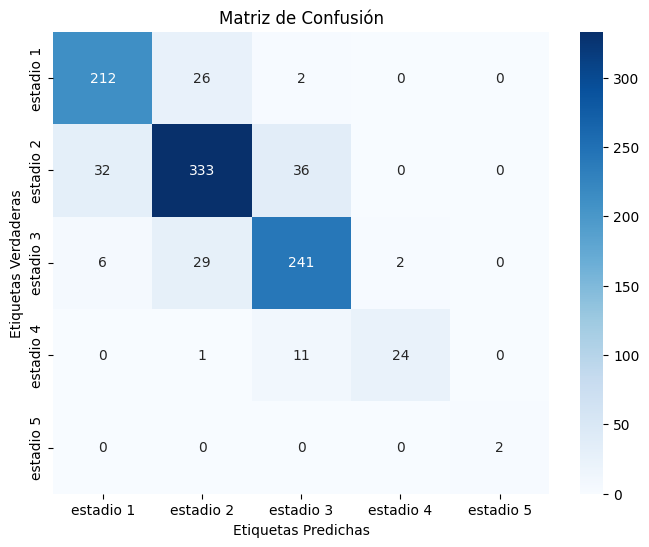

variance del Modelo: 0.17972831765935215
sesgo del Modelo: -0.018808777429467086


In [ ]:
# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print("Precisión del Modelo: %.2f%%" % (accuracy * 100.0))

# Definir un mapeo de renombre de clases
class_mapping = {
    0: 'estadio 1',
    1: 'estadio 2',
    2: 'estadio 3',
    3: 'estadio 4',
    4: 'estadio 5'
}

# Aplicar el renombre de clases a las etiquetas reales y predichas
y_test_mapped = [class_mapping[cl] for cl in y_test]
y_pred_mapped = [class_mapping[cl] for cl in y_pred]

# Mostrar el reporte de clasificación con las clases renombradas
print('Reporte de Clasificación:')
print(classification_report(y_test_mapped, y_pred_mapped))

# Calcular y mostrar la matriz de confusión con nombres de estadio
conf_matrix = confusion_matrix(y_test_mapped, y_pred_mapped)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()
import numpy as np
# Suponiendo que 'y_true' son los valores reales y 'y_pred' son las predicciones del modelo en el conjunto de validación
residuals = y_test - y_pred
variance = np.mean(residuals**2)
print("variance del Modelo:", variance)


bias = np.mean(y_pred - y_test)
print("sesgo del Modelo:", bias)

In [ ]:
#Prediccion del modelo
import pandas as pd
import requests

# Definir la URL del servidor de predicción
url = "http://localhost:5000/predict"

# Ruta al archivo Excel
excel_file_path = "/content/variables.xlsx"

# Leer el archivo Excel en un DataFrame de pandas
df = pd.read_excel(excel_file_path)

# Mostrar el DataFrame leído del archivo Excel
print("Datos del archivo Excel:")
print(df)

# Convertir el DataFrame a una lista de listas
multiple_data = df.values.tolist()

# Lista para almacenar las predicciones
all_predictions = []

# Hacer predicciones para cada instancia de datos
for data_instance in multiple_data:
    predictions = model.predict([data_instance])
    all_predictions.append(predictions[0])

# Agregar las predicciones al DataFrame
df['PREDICCION'] = all_predictions


# Mapear códigos numéricos a nombres de estadios
mapeo_estadios = {0: 'Estadio 1', 1: 'Estadio 2', 2: 'Estadio 3', 3: 'Estadio 4', 4: 'Estadio 5'}

# Aplicar el mapeo a la columna 'PREDICCION'
df['PREDICCION'] = df['PREDICCION'].map(mapeo_estadios)

# Guardar el DataFrame modificado en un nuevo archivo Excel
output_excel_path = "/content/variables_con_prediccion_XGB.xlsx"
df.to_excel(output_excel_path, index=False)

# Mostrar el DataFrame con la nueva columna de predicciones
print("Datos con predicciones:")
print(df)

# Mostrar el mensaje de ruta del nuevo archivo Excel
print(f"Nuevo archivo Excel guardado en: {output_excel_path}")



Datos del archivo Excel:
         EDAD  CREA        IMC  ETIO_ERC  Sexo  G_POB  COLES   TA  DX_ERC  \
0   96.000000  5.48  18.000000        98     2     61    173  130       2   
1   59.509589  0.58  25.631167        98     2     61    147  117       0   
2   71.197260  0.97  26.026175         8     2     31    221  118       1   
3  101.556164  0.80  27.471384         8     1     31    183  140       1   
4   83.358904  3.75  26.729927         5     1     31    112  140       1   
5   71.542466  1.00  26.078972         8     1     31    150  123       1   
6   85.594521  1.81  22.206331         8     2     31    199  150       1   
7   55.621918  0.60  35.250761        98     2      5    232  133       0   
8   95.169863  0.75  22.769438         8     1     31    155  140       1   

   ALB/CREA  TIEMP_SERVI  PROG_ERC  ANTAGONISTA  RECIBIO_TRANS  
0       9.0            1         2            2              5  
1       7.0           12         2            2              5  
2       1

# **Redes Neuronales Feedforward**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout

from sklearn.preprocessing import LabelEncoder

model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=5, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)  # You can adjust the number of epochs and batch size as needed


Epoch 1/50
80/80 [==============================] - 2s 4ms/step - loss: 5.4001 - accuracy: 0.2967
Epoch 2/50
80/80 [==============================] - 0s 4ms/step - loss: 1.3939 - accuracy: 0.4575
Epoch 3/50
80/80 [==============================] - 0s 4ms/step - loss: 1.2482 - accuracy: 0.4535
Epoch 4/50
80/80 [==============================] - 0s 4ms/step - loss: 1.1686 - accuracy: 0.4782
Epoch 5/50
80/80 [==============================] - 0s 4ms/step - loss: 1.1368 - accuracy: 0.4837
Epoch 6/50
80/80 [==============================] - 0s 4ms/step - loss: 1.0956 - accuracy: 0.5116
Epoch 7/50
80/80 [==============================] - 0s 4ms/step - loss: 1.0803 - accuracy: 0.5076
Epoch 8/50
80/80 [==============================] - 0s 4ms/step - loss: 1.0379 - accuracy: 0.5335
Epoch 9/50
80/80 [==============================] - 0s 4ms/step - loss: 1.0504 - accuracy: 0.5304
Epoch 10/50
80/80 [==============================] - 0s 3ms/step - loss: 1.0018 - accuracy: 0.5610
Epoch 11/50
80/80 [

Epoch 1/50
100/100 [==============================] - 0s 3ms/step - loss: 0.8253 - accuracy: 0.6538
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.7759 - accuracy: 0.6707
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.7764 - accuracy: 0.6786
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.7943 - accuracy: 0.6742
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.7957 - accuracy: 0.6585
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.7918 - accuracy: 0.6704
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.7472 - accuracy: 0.6892
Epoch 8/50
100/100 [==============================] - 0s 2ms/step - loss: 0.7547 - accuracy: 0.6911
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - loss: 0.7707 - accuracy: 0.6908
Epoch 10/50
100/100 [==============================] - 0s 4ms/step - loss: 0.7450 - accuracy: 0.6996

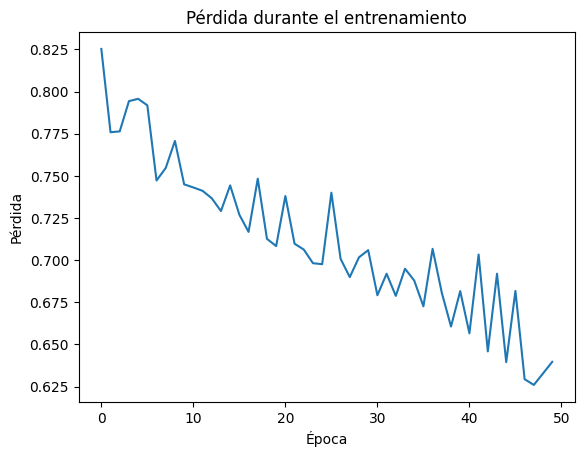

In [ ]:
history = model.fit(X, y, epochs=50, verbose=1)

# Evaluar el modelo
loss, accuracy = model.evaluate(X, y)
print(f'Pérdida: {loss:.4f}')
print(f'Precisión: {accuracy*100:.2f}%')

# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'])
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

30/30 [==============================] - 0s 2ms/step
Precisión del Modelo: 77.22%
Reporte de Clasificación:
              precision    recall  f1-score   support

   Estadio 1       0.76      0.86      0.81       240
   Estadio 2       0.74      0.79      0.77       401
   Estadio 3       0.83      0.69      0.76       278
   Estadio 4       0.85      0.64      0.73        36
   Estadio 5       0.50      0.50      0.50         2

    accuracy                           0.77       957
   macro avg       0.74      0.70      0.71       957
weighted avg       0.78      0.77      0.77       957



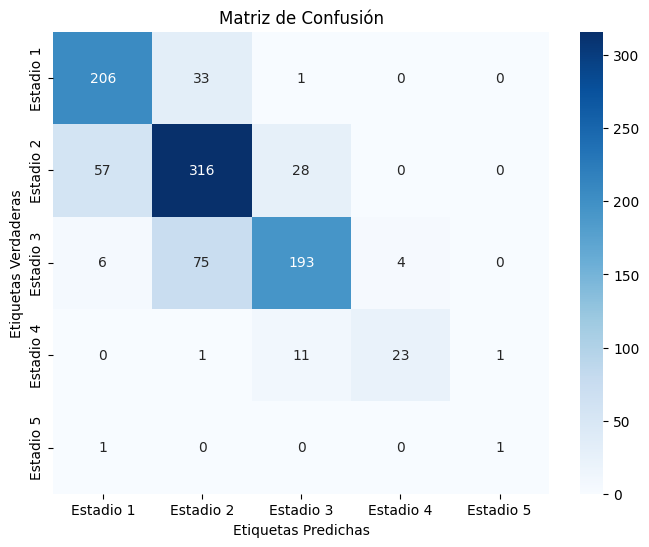

variance del Modelo: 0.17972831765935215
sesgo del Modelo: -0.018808777429467086


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener predicciones del conjunto de prueba
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)


# Asegúrate de que y_test tenga la misma longitud que y_pred
y_test_subset = y_test[:len(y_pred)]
# Definir un mapeo de renombre de clases
class_mapping = {
    0: 'Estadio 1',
    1: 'Estadio 2',
    2: 'Estadio 3',
    3: 'Estadio 4',
    4: 'Estadio 5'
}

# Aplicar el renombre de clases a las etiquetas reales y predichas
y_test_mapped = [class_mapping[cl] for cl in y_test]
y_pred_mapped = [class_mapping[cl] for cl in y_pred_labels]

# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test_mapped, y_pred_mapped)
print("Precisión del Modelo: %.2f%%" % (accuracy * 100.0))

# Mostrar el reporte de clasificación con nombres de clases personalizados
print('Reporte de Clasificación:')
print(classification_report(y_test_mapped, y_pred_mapped))

# Calcular y mostrar la matriz de confusión con nombres de clases personalizados
conf_matrix = confusion_matrix(y_test_mapped, y_pred_mapped)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

import numpy as np
# Suponiendo que 'y_true' son los valores reales y 'y_pred' son las predicciones del modelo en el conjunto de validación
residuals = y_test - y_pred
variance = np.mean(residuals**2)
print("variance del Modelo:", variance)


bias = np.mean(y_pred - y_test)
print("sesgo del Modelo:", bias)


In [ ]:
#Prediccion del modelo
import pandas as pd
import requests

# Definir la URL del servidor de predicción
url = "http://localhost:5000/predict"

# Ruta al archivo Excel
excel_file_path = "/content/variables.xlsx"

# Leer el archivo Excel en un DataFrame de pandas
df = pd.read_excel(excel_file_path)

# Mostrar el DataFrame leído del archivo Excel
print("Datos del archivo Excel:")
print(df)

# Convertir el DataFrame a una lista de listas
multiple_data = df.values.tolist()

# Hacer predicciones para cada instancia de datos
all_predictions = []

# Convertir las predicciones a valores escalares
for data_instance in multiple_data:
    predictions = model.predict([data_instance])
    all_predictions.append(np.argmax(predictions))

# Agregar las predicciones convertidas al DataFrame
df['PREDICCION'] = all_predictions

# Mapear códigos numéricos a nombres de estadios
mapeo_estadios = {0: 'Estadio 1', 1: 'Estadio 2', 2: 'Estadio 3', 3: 'Estadio 4', 4: 'Estadio 5'}

# Aplicar el mapeo a la columna 'PREDICCION'
df['PREDICCION'] = df['PREDICCION'].map(mapeo_estadios)

# Guardar el DataFrame modificado en un nuevo archivo Excel
output_excel_path = "/content/variables_con_prediccion_Feedforward.xlsx"
df.to_excel(output_excel_path, index=False)

# Mostrar el DataFrame con la nueva columna de predicciones
print("Datos con predicciones:")
print(df)

# Mostrar el mensaje de ruta del nuevo archivo Excel
print(f"Nuevo archivo Excel guardado en: {output_excel_path}")


Datos del archivo Excel:
         EDAD  CREA        IMC  ETIO_ERC  Sexo  G_POB  COLES   TA  DX_ERC  \
0   96.000000  5.48  18.000000        98     2     61    173  130       2   
1   59.509589  0.58  25.631167        98     2     61    147  117       0   
2   71.197260  0.97  26.026175         8     2     31    221  118       1   
3  101.556164  0.80  27.471384         8     1     31    183  140       1   
4   83.358904  3.75  26.729927         5     1     31    112  140       1   
5   71.542466  1.00  26.078972         8     1     31    150  123       1   
6   85.594521  1.81  22.206331         8     2     31    199  150       1   
7   55.621918  0.60  35.250761        98     2      5    232  133       0   
8   95.169863  0.75  22.769438         8     1     31    155  140       1   

   ALB/CREA  TIEMP_SERVI  PROG_ERC  ANTAGONISTA  RECIBIO_TRANS  
0       9.0            1         2            2              5  
1       7.0           12         2            2              5  
2       1